In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('FinalData.csv')

In [3]:
df.columns = ['Delete', 'Cough', 'Fever', 'Sore Throat', 'Shortness of Breath', 'Headache', 'Contact with Infectious', 'Test Result']
del df['Delete']

In [4]:
from sklearn.preprocessing import LabelEncoder
columns = ['Cough', 'Fever', 'Sore Throat', 'Shortness of Breath', 'Headache', 'Contact with Infectious', 'Test Result']
label_encoder = LabelEncoder()
for column in columns:
    df[column] = label_encoder.fit_transform(df[column])  # All the data is now numeric!

In [5]:
df

,Cough,Fever,Sore Throat,Shortness of Breath,Headache,Contact with Infectious,Test Result
0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0
4,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...
13757,0,0,0,0,0,0,0
13758,0,0,0,0,0,0,0
13759,0,0,0,0,0,0,0
13760,0,0,0,0,0,0,0


In [6]:
data = df[['Cough', 'Fever', 'Sore Throat', 'Shortness of Breath', 'Headache', 'Contact with Infectious']]

In [7]:
target = df[['Test Result']]

In [8]:
data = data.to_numpy()
data # Convert predictors to NumPy array

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [9]:
target = target.to_numpy()
target # Convert target variable to NumPy array

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [10]:
X = data
y = target
y.shape = (13762,)

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y) # X = predictors and y = target
model = DecisionTreeClassifier(max_depth=20)# Create model
model.fit(Xtrain, ytrain) # Train model to define ytrain outcomes as function of Xtrain attributes
ypred = model.predict(Xtest) # Use newly trained model to predict outcomes based on new testing predictors
print("{0} / {1} predicted correctly".format(np.sum(ytest == ypred), len(ytest))) # How similar are the actual testing outcomes to the model's predictions?

3360 / 3441 predicted correctly


In [12]:
metrics.accuracy_score(ytest, ypred) # How close are the predictions of 'test result' in testing data to reality?

0.976460331299041

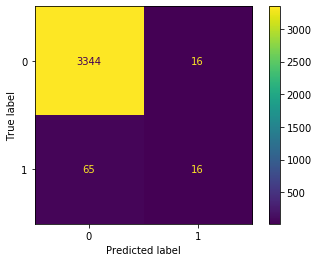

In [13]:
from sklearn.metrics import ConfusionMatrixDisplay
matrix = confusion_matrix(ytest, ypred, labels=model.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=model.classes_)
display.plot()

In [14]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred, labels=model.classes_))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3360
           1       0.50      0.20      0.28        81

    accuracy                           0.98      3441
   macro avg       0.74      0.60      0.64      3441
weighted avg       0.97      0.98      0.97      3441



In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)
model2 = RandomForestClassifier(n_estimators=100, random_state=0)
model2.fit(Xtrain, ytrain)
ypred = model2.predict(Xtest)
print("{0} / {1} predicted correctly".format(np.sum(ytest == ypred), len(ytest)))

3367 / 3441 predicted correctly


In [17]:
metrics.accuracy_score(ytest, ypred)

0.978494623655914

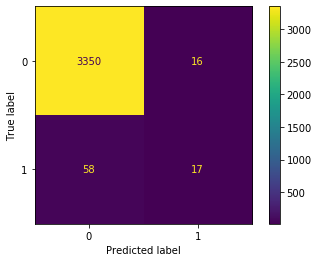

In [18]:
from sklearn.metrics import ConfusionMatrixDisplay
matrix = confusion_matrix(ytest, ypred, labels=model.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=model.classes_)
display.plot()

In [19]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred, labels=model.classes_))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3366
           1       0.52      0.23      0.31        75

    accuracy                           0.98      3441
   macro avg       0.75      0.61      0.65      3441
weighted avg       0.97      0.98      0.97      3441

